In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [48]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
directory=r'D:\Python Projects\Cat_vs_Dog\train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20144 files belonging to 4 classes.


In [47]:
for images, labels in train_ds.take(1):
    # Display the pixel values of the first image
    first_image = images[0].numpy()
    print("Pixel values of the first image:")
    print(first_image)

Pixel values of the first image:
[[[ 51.447548   54.447548   37.447548 ]
  [ 43.679134   43.40765    27.831478 ]
  [ 50.         45.165745   33.342068 ]
  ...
  [ 62.490776   59.863823   45.609917 ]
  [ 82.52034    85.82503    65.993    ]
  [ 55.32869    65.32869    40.565018 ]]

 [[ 59.222103   62.258106   47.012566 ]
  [ 44.635647   44.364162   30.20596  ]
  [ 50.97347    45.85433    35.04492  ]
  ...
  [ 73.2189     70.59195    56.338047 ]
  [ 80.32168    83.217865   66.955666 ]
  [ 56.57842    65.86943    46.832325 ]]

 [[ 64.44168    68.44168    53.623318 ]
  [ 44.180016   44.998375   31.361656 ]
  [ 52.69547    47.57633    37.312656 ]
  ...
  [ 80.9955     78.25466    64.34239  ]
  [ 76.34685    78.89372    65.36166  ]
  [ 53.389484   61.389484   48.752766 ]]

 ...

 [[ 42.727375   49.727375   16.529839 ]
  [ 50.553734   61.21975    26.84003  ]
  [ 64.54924    76.66838    42.21781  ]
  ...
  [ 55.928932   47.94396    30.379505 ]
  [102.94531    82.91211    66.91211  ]
  [111.1437

In [49]:
validation_ds = keras.utils.image_dataset_from_directory(
directory=r'D:\Python Projects\Cat_vs_Dog\test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [50]:
# Normalize to reduce pixel sizes from 0-256 to 0-1

def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [51]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
630/630 [==============================] - 1342s 2s/step - loss: 1.2701 - accuracy: 0.5951 - val_loss: 0.6181 - val_accuracy: 0.6342
Epoch 2/10
630/630 [==============================] - 1277s 2s/step - loss: 0.5693 - accuracy: 0.7003 - val_loss: 0.5807 - val_accuracy: 0.6752
Epoch 3/10
630/630 [==============================] - 1276s 2s/step - loss: 0.4915 - accuracy: 0.7569 - val_loss: 0.4633 - val_accuracy: 0.7836
Epoch 4/10
630/630 [==============================] - 1284s 2s/step - loss: 0.4392 - accuracy: 0.7847 - val_loss: 0.4922 - val_accuracy: 0.7680
Epoch 5/10
630/630 [==============================] - 1286s 2s/step - loss: 0.4465 - accuracy: 0.7739 - val_loss: 0.5339 - val_accuracy: 0.7436
Epoch 6/10
630/630 [==============================] - 1288s 2s/step - loss: 0.3351 - accuracy: 0.7630 - val_loss: 1.4785 - val_accuracy: 0.6348
Epoch 7/10
630/630 [==============================] - 1287s 2s/step - loss: -0.1906 - accuracy: 0.7122 - val_loss: 0.6015 - val_accuracy

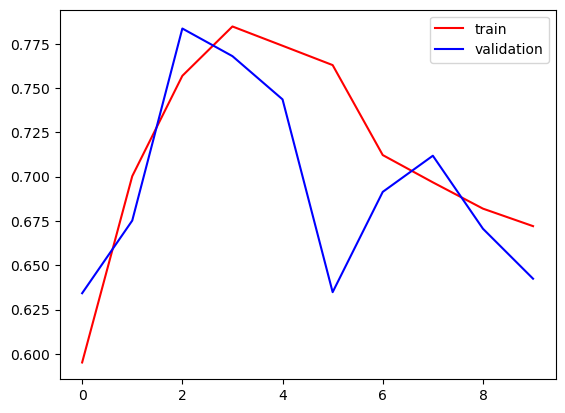

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

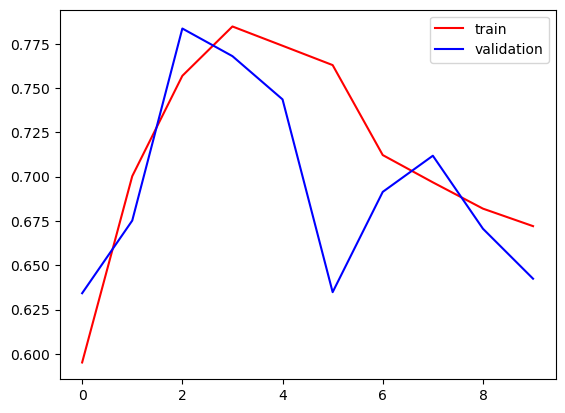

In [56]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [57]:
import cv2

In [86]:
test_img = cv2.imread('cat.6269.jpg')

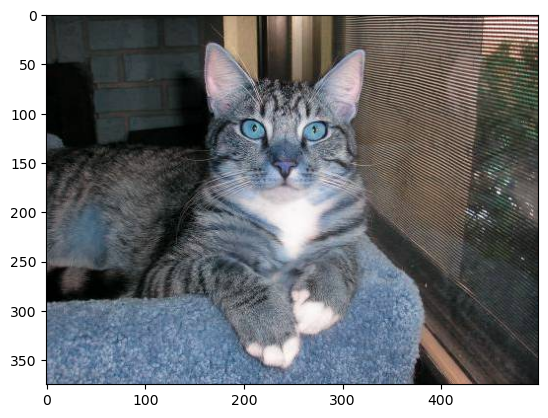

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape

(375, 499, 3)

In [89]:
test_img = cv2.resize(test_img,(256,256))

In [90]:
test_input = test_img.reshape((1,256,256,3))

In [91]:
model.predict(test_input)

1/1 [==============================] - 0s 50ms/step


array([[0.]], dtype=float32)